In [1]:
#Trabalho - Métodos Iterativos para Solução de Sistemas Lineares
#Aluna: Giovanna Carreira Marinho

In [2]:
#importando e configurando as bibliotecas necessárias para a resolução dos exercícios
import numpy as np
from scipy.linalg import hilbert
import pandas as pd

%matplotlib inline

# 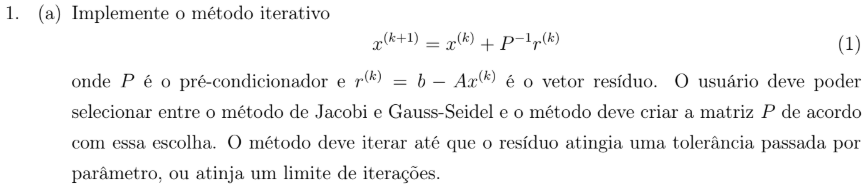

In [3]:
def metIterativo(A, b, x = None, tol = 1e-3, maxIt = 50, metodo="Jacobi"):
    #método iterativo que aceita como parâmetro: os elementos A, x e b, do sistema (Ax = b); a tolerância; o número máximo de itrações do método; 
    #uma string opcional (metodo), que representa o método selecionado pelo usuário ("Jacobi" ou "Gauss-Seidel"), caso o mesmo não selecione, o método padrão será o de "Jacobi" 
        
    b = b.flatten().reshape((b.shape[0], 1)) #garantindo o formato da matriz b
    
    if(metodo.lower() == "jacobi"): #criando a matriz P (pré-condicionador) de acordo com o método escolhido
        P = np.diag(np.diag(A)) #P=D
    elif(metodo.lower() == "gauss-seidel"):
        P = np.diag(np.diag(A)) - np.tril(-A, -1) #P=D-E
    else: #tratamento de erro na seleção do método
        raise Exception(" > ERRO - Selecione entre o método de 'Jacobi' e 'Gauss-Seidel'")
        
    invP = np.linalg.inv(P) #calculando a matriz inversa de P

    if x is None:
        x = np.zeros(b.shape) #criando o vetor x, caso ainda não exista
    
    for it in range(maxIt): #iterando até que o número máximo de iterações (limite) seja atingido
        r = b - A.dot(x) #calculando o vetor resíduo do processo iterativo
        
        er = max(np.abs(r)) #calculando o erro -> máximo do valor absoluto do vetor resíduo
        
        if er <= tol: #verificando se o erro atingiu a tolerância
            print("> Método iterativo -", metodo, ": Tolerância atingida")
            return x, it, er

        x = x + invP.dot(r) #método iterativo
        
    print("> Método iterativo -", metodo, ": Máximo de iterações atingido")
    return x, maxIt, er

# 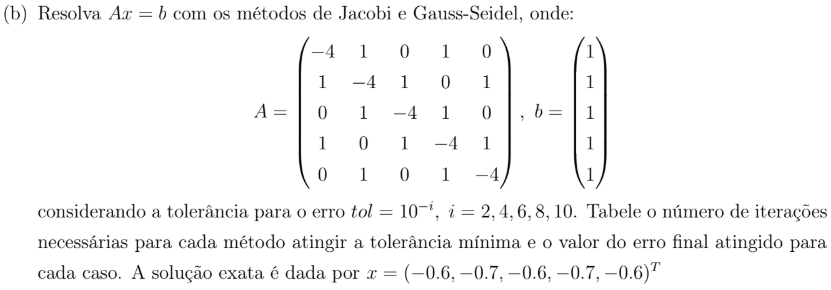

In [4]:
#definindo os componentes do sistema
A = np.array([[-4, 1, 0, 1, 0], [1, -4, 1, 0, 1], [0, 1, -4, 1, 0], [1, 0, 1, -4, 1], [0, 1, 0, 1, -4]])
b = np.ones((5, 1))
xExat = [[-0.6], [-0.7], [-0.6], [-0.7], [-0.6]]

#criando a tabela
colunas = ['i', 'Iterações (J)', 'Erro (J)', 'Iterações (GS)', 'Erro (GS)'] #J->Jacobi, GS->Gauss-Seidel
df = pd.DataFrame(columns=colunas)

for i in [2, 4, 6, 8, 10]: #iterando sobre os i's da tolerância
    xAproxJ, itJ, errJ = metIterativo(A, b, tol = 10**(-i), metodo = "Jacobi") #calculando o método iterativo com o método de Jacobi
    xAproxGS, itGS, errGS = metIterativo(A, b, tol = 10**(-i), metodo = "Gauss-Seidel") #calculando o método iterativo com o método de Gauss-Seidel
    df.loc[i] = [i, itJ, errJ[0], itGS, errGS[0]] #colocando os valores na tabela

#configurando a tabela
df.style.\
    set_properties(**{'text-align': 'center'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])]).\
    hide_index()

> Método iterativo - Jacobi : Tolerância atingida
> Método iterativo - Gauss-Seidel : Tolerância atingida
> Método iterativo - Jacobi : Tolerância atingida
> Método iterativo - Gauss-Seidel : Tolerância atingida
> Método iterativo - Jacobi : Tolerância atingida
> Método iterativo - Gauss-Seidel : Tolerância atingida
> Método iterativo - Jacobi : Tolerância atingida
> Método iterativo - Gauss-Seidel : Tolerância atingida
> Método iterativo - Jacobi : Tolerância atingida
> Método iterativo - Gauss-Seidel : Tolerância atingida


i,Iterações (J),Erro (J),Iterações (GS),Erro (GS)
2,10,0.00741577,7,0.00396649
4,20,5.49937e-05,11,9.51767e-05
6,29,8.15641e-07,16,8.98544e-07
8,38,8.06481e-09,21,8.48294e-09
10,48,5.98068e-11,26,8.00856e-11


### Pelos resultados da tabela acima, observa-se que o método de Gauss-Seidel converge mais rápido que o método de Jacobi, já que o número de iterações daquele é menor. Dessa forma, o método de Gauss-Seidel foi mais rápido. 
### A respeito do erro final atingido por cada método (de acordo com o vetor resíduo), observa-se que o erro nos dois métodos possuem mesma ordem de grandeza.

# 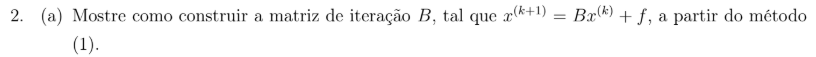

### Uma vez que o vetor resíduo do processo iterativo é dado por: $r^{(k)} = b - Ax^{(k)}$, ao substituir em $x^{(k+1)} = x^{(k)} + P^{-1}r^{(k)}$ (1), temos:
$$x^{(k+1)} = x^{(k)} + P^{-1}(b - Ax^{(k)})$$
$$x^{(k+1)} = Ix^{(k)} - P^{-1}Ax^{(k)} + P^{-1}b$$
$$x^{(k+1)} = (I - P^{-1}A)x^{(k)} + P^{-1}b$$
$$x^{(k+1)} = (P^{-1}P - P^{-1}A)x^{(k)} + P^{-1}b$$
$$x^{(k+1)} = P^{-1}(P - A)x^{(k)} + P^{-1}b$$
### Decompondo a matriz $A$ do sistema linear $(Ax=b)$, para construção do método iterativo, como $A=P-N$, sendo $P$ uma matriz não singular $(det(P)\ne0)$, chamada de pré-condicionador, e $N$ uma matriz a ser definida. Dessa forma, substituindo $N=P-A$ na expressão acima, temos:
$$x^{(k+1)} = P^{-1}Nx^{(k)} + P^{-1}b$$
### Portanto, tomando $B=P^{-1}N$ e $f=P^{-1}b$, obtem-se:
$$x^{(k+1)} = Bx^{(k)} + f$$
### Dessa forma, pode ser definida a matriz de iteração $B$ para os métodos de Jacobi e Gauss-Seidel:
#### - No método de Jacobi, como $P=D$ e $N=D-A$, a matriz de iteração é dada por:
$$B=P^{-1}N=D^{-1}(D-A)$$
#### - No método de Gauss-Seidel, como $P=D-E$ e $ N=F$, a matriz de iteração é dada por:
$$B=P^{-1}N=(D-E)^{-1}F$$
### Sendo $D$ uma matriz diagonal formada pelos elementos da diagonal principal de $A$; $E$ e $F$ duas matrizes formadas pelos elementos abaixo e acima, respectivamente, da diagonal principal de $A$ com o sinal oposto.

# 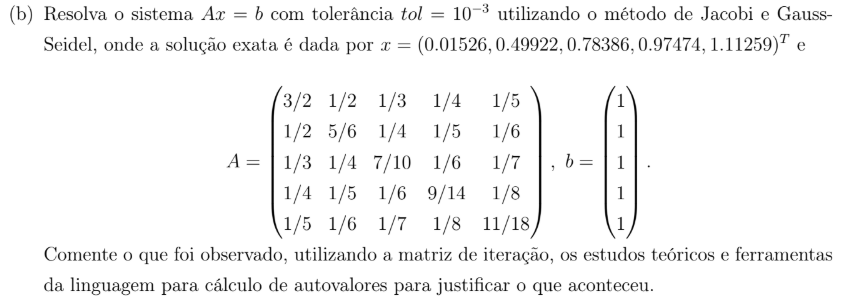

In [5]:
#definindo os componentes do sistema
A = hilbert(5) + np.eye(5) * .5
b = np.ones((5, 1))
xExat = [[0.01526], [0.49922], [0.78386], [0.97474], [1.11259]]

xAprox, it, err = metIterativo(A, b, tol = 10**(-3), metodo = "Jacobi") #calculando o método iterativo com o método de Jacobi
print(" Iterações: ", it, "\n Resultado:\n", xAprox, "\n Erro atingido:", err, "\n")
xAprox, it, err = metIterativo(A, b, tol = 10**(-3), metodo = "Gauss-Seidel") #calculando o método iterativo com o método de Gauss-Seidel
print(" Iterações: ", it, "\n Resultado:\n", xAprox, "\n Erro atingido:", err)

BJ = np.linalg.inv(np.diag(np.diag(A))).dot(np.diag(np.diag(A)) - A) #matriz de iteração B (método de Jacobi): D^(-1).(D - A)
print('\n>Matriz de iteração BJ: \n', BJ)
aval = np.linalg.eigvals(BJ) #calculando os autovalores de B
print('\nAutovalores de BJ:', aval)
print('\nMax |Autovalores BJ|:', max(np.abs(aval)))

BGS = np.linalg.inv(np.diag(np.diag(A)) - np.tril(-A, -1)).dot(np.triu(-A, 1)) #matriz de iteração B (método de Gauss-Seidel): (D - E)^(-1).(F)
print('\n>Matriz de iteração BGS: \n', BGS)
aval = np.linalg.eigvals(BGS) #calculando os autovalores de B
print('\nAutovalores de BGS:', aval)
print('\nMax |Autovalores BGS|:', max(np.abs(aval)))

> Método iterativo - Jacobi : Máximo de iterações atingido
 Iterações:  50 
 Resultado:
 [[-105.40959539]
 [-144.11048601]
 [-140.60957198]
 [-130.04783455]
 [-118.9620549 ]] 
 Erro atingido: [300.05821829] 

> Método iterativo - Gauss-Seidel : Tolerância atingida
 Iterações:  6 
 Resultado:
 [[0.01611486]
 [0.49873758]
 [0.78337983]
 [0.97452048]
 [1.11260885]] 
 Erro atingido: [0.00081958]

>Matriz de iteração BJ: 
 [[ 0.         -0.33333333 -0.22222222 -0.16666667 -0.13333333]
 [-0.6         0.         -0.3        -0.24       -0.2       ]
 [-0.47619048 -0.35714286  0.         -0.23809524 -0.20408163]
 [-0.38888889 -0.31111111 -0.25925926  0.         -0.19444444]
 [-0.32727273 -0.27272727 -0.23376623 -0.20454545  0.        ]]

Autovalores de BJ: [-1.11426331  0.44849134  0.29228818  0.15703579  0.216448  ]

Max |Autovalores BJ|: 1.1142633083992002

>Matriz de iteração BGS: 
 [[ 0.         -0.33333333 -0.22222222 -0.16666667 -0.13333333]
 [ 0.          0.2        -0.16666667 -0.14    

### Um método iterativo produz uma sequência de valores que converge para a solução do sistema, se e somente se,  $max_{1 \le i \le n} |\lambda _i ^B| < 1$, ou seja, o maior autovalor de $B$ em valor absoluto é menor que $1$.
### Pelos resultados acima, observa-se que, para o método de Jacobi, o $max_{1 \le i \le 5} |\lambda _i ^{BJ}| = 1.1 > 1$, dessa forma, não houve uma convergência para que se obtivesse a solução do sistema, por isso o máximo de iterações foi atingido.
### Já para o método de Gauss-Seidel, como o valor de $max_{1 \le i \le 5} |\lambda _i ^{BGS}| = 0.27 < 1$, houve uma convergência para a solução. Além disso, como esse valor é pequeno, o número de iterações necessárias foi pequeno.